In [1]:
import pandas as pd
import numpy as np

from utils.dataprep import load_emb_gz, make_categories, load_emb

In [27]:
embedding_file = "data/imagenet-27x80-vgg19.test-ctg.emb.gz"

# embedding_file = "data/esp-10000-vgg19.emb.gz"
# embedding_file = "data/imagenet-200x65-vgg19.train.emb.gz"
# results_file = "models/200807-190731-basic.res.csv"
# results_file = "models/200807-190731-basic-noctg.res.csv"
# results_file = "models/200807-190731-basic-esp.res.csv"
# results_file = "models/200807-200959-basic4-noctg.res.csv"
# results_file = "models/200808-135631-switch4-esp.res.csv"


results_file = "test_outputs/000-200822-190027-swi-4-gib-50-47.res.csv"
# results_file = "test_outputs/200827-104336-noexplore.res.csv"
# New architecture, gibbs sampling
# results_file = "test_outputs/000-200824-063024-swi-4-gib-100-40.res.csv"
# New architecture, no exploring
# results_file = "test_outputs/000-200824-045043-swi-4-FAL-100-40.res.csv"

### Load categories

In [28]:
_, labels, _ = load_emb_gz(embedding_file)
categories = make_categories(labels)
categories

DONE. 2193 items loaded from data/imagenet-27x80-vgg19.test-ctg.emb.gz.
27 categories found.


array([4, 4, 4, ..., 6, 6, 6], dtype=int64)

In [29]:
np.unique(categories)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

### Load results

In [30]:
results = pd.read_csv(results_file, index_col=0)
df = results[["target_image", "active_images", "chosen_symbol", "chosen_image_index", "success"]]

In [31]:
results

,sender_name,receiver_name,active_images,target_image,chosen_symbol,chosen_symbol_p,chosen_image,chosen_image_p,chosen_image_index,success
0,01.sender,02.receiver,993:1276:654:1674,993,[6],[0.13781165],[1276],[0.5283167],[0],0
1,01.sender,02.receiver,1747:81:554:894,1747,[6],[0.9858225],[1747],[0.9597532],[1],1
2,01.sender,02.receiver,192:248:637:1665,192,[1],[0.12783748],[248],[0.69776785],[1],0
3,01.sender,02.receiver,1607:2162:8:1224,1607,[8],[0.10226989],[1607],[0.693935],[2],1
4,01.sender,02.receiver,2167:501:1132:1868,2167,[3],[0.20812732],[2167],[0.39441484],[1],1
...,...,...,...,...,...,...,...,...,...,...
2995,02.sender,01.receiver,565:2114:1021:920,565,[1],[0.52383554],[565],[0.47320017],[2],1
2996,02.sender,01.receiver,1102:938:441:883,1102,[3],[0.22238322],[1102],[0.36376274],[1],1
2997,02.sender,01.receiver,829:2058:14:1230,829,[3],[0.0204738],[2058],[0.38633636],[1],0
2998,02.sender,01.receiver,1332:1067:738:952,1332,[6],[0.20791899],[1067],[0.19852008],[1],0


In [32]:
df.loc[:, "category"] = df.apply(lambda x: categories[x.loc["target_image"]], axis=1)
df.loc[:, "chosen_symbol"] = df.loc[:, "chosen_symbol"].apply(lambda x: int(x.strip("[]")))
df.loc[:, "chosen_image_index"] = df.loc[:, "chosen_image_index"].apply(lambda x: int(x.strip("[]")))

D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
df

,target_image,active_images,chosen_symbol,chosen_image_index,success,category
0,993,993:1276:654:1674,6,0,0,20
1,1747,1747:81:554:894,6,1,1,7
2,192,192:248:637:1665,1,1,0,12
3,1607,1607:2162:8:1224,8,2,1,16
4,2167,2167:501:1132:1868,3,1,1,6
...,...,...,...,...,...,...
2995,565,565:2114:1021:920,1,2,1,1
2996,1102,1102:938:441:883,3,1,1,18
2997,829,829:2058:14:1230,3,1,0,19
2998,1332,1332:1067:738:952,6,1,0,11


There shouldn't be any correlation between *chosen_symbol* and *image_index*:

In [34]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["chosen_image_index"], aggfunc=np.size)

chosen_image_index,0,1,2,3
chosen_symbol,,,,
0,67,69,69,90
1,96,86,82,91
2,105,91,86,80
3,85,107,81,66
4,68,63,55,55
5,84,83,80,88
6,81,85,67,76
7,50,67,54,50
8,73,73,61,67


In [35]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["success"], aggfunc=np.size)

success,0,1
chosen_symbol,,
0,146,149
1,168,187
2,176,186
3,142,197
4,118,123
5,136,199
6,132,177
7,103,118
8,82,192


## tSNE

In [36]:
from sklearn.manifold import TSNE

In [59]:
data = np.zeros([len(categories), (df.loc[:, "chosen_symbol"].max() + 1)])
for k, row in df.iterrows():
    target = row["target_image"]
    other = row["active_images"].split(":")
    for img in other:
        img = int(img)
        if img == target:
            data[img, row["chosen_symbol"]] += 1
        else:
            data[img, row["chosen_symbol"]] -= 0.05
# data = data / data.sum(axis=1)[:, np.newaxis]
notnan = np.where(~np.isnan(data).any(axis=1))
data = data[notnan, :][0]

In [49]:
data.shape

(2193, 10)

In [60]:
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(data)

In [51]:
import matplotlib.pyplot as plt

## Scatterplot with image categories

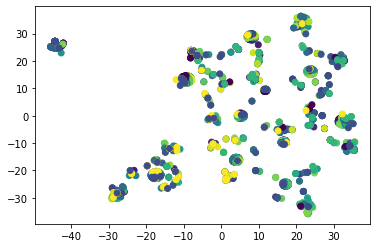

In [56]:
plt.scatter(*reduced.T, c=categories[notnan])

Symbol usage obviously doesn't correlate with imagenet categories. This is in accord with the fact that ignoring the categories in training doesn't affect the training process at all.

## Control plot with used symbols

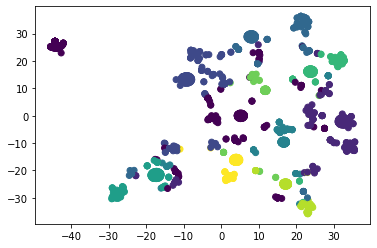

In [57]:
plt.scatter(*reduced.T, c=data.argmax(axis=1))

This is just to make sure that the tSNE works. It does.

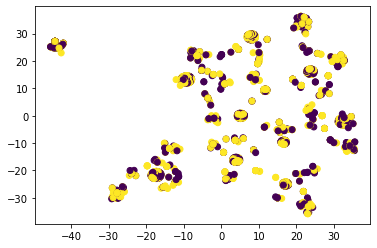

In [58]:
plt.scatter(*reduced.T, c=df.loc[notnan, "success"])